# Exercice1 : Health Expetancy

# Librairie

In [1]:
# importer les librairies necessaire
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import pearsonr 
from scipy.stats import ttest_ind
from scipy.stats import  ttest_1samp


print("seaborn versionr: ", sns.__version__)
print("pandas version :" ,pd.__version__)
print("matplotlib.pyplot version " ,matplotlib.__version__)
print("scipy versiion:" , scipy.__version__)

seaborn versionr:  0.13.2
pandas version : 2.2.3
matplotlib.pyplot version  3.10.1
scipy versiion: 1.15.2


### importer le dataset 

In [2]:

df = sns.load_dataset('healthexp')

### TOUR D'HORIZON DU DATASET

In [3]:
##information generale sur le dataset via df.info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [4]:
## connaitre le nombre de valeur unique dans le dataset
df.nunique()

Year                51
Country              6
Spending_USD       274
Life_Expectancy    118
dtype: int64

In [5]:
#voir les 5 premieres lignes du dataset
df.head()


,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


Dans les vidéos précédentes, nous avons pu observer certains phénomènes :
### 1. Spending_USD et Life_Expectancy semblent être corrélées.
- Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?


visualisation

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

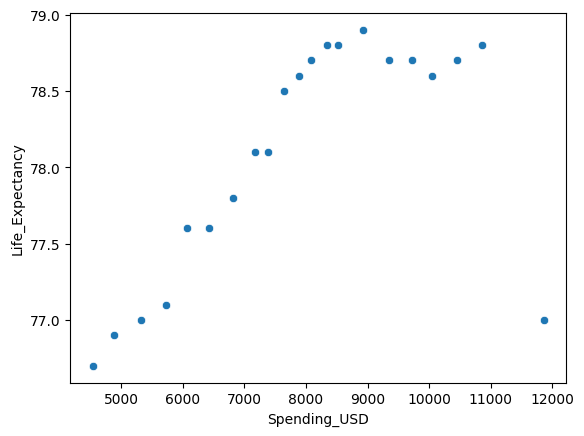

In [6]:
filtered_df=df.query(" `Year`>=2000 & `Country`== 'USA' ")

sns.scatterplot(data=filtered_df, x="Spending_USD",y="Life_Expectancy")

Aplication du test de person

In [7]:
result_person_test=pearsonr(filtered_df["Spending_USD"],filtered_df["Life_Expectancy"])
result_person_test


PearsonRResult(statistic=np.float64(0.6210674528998252), pvalue=np.float64(0.0026581544805799064))

conclusion (test de pearson)

In [8]:
print("",result_person_test.statistic)

 0.6210674528998252


In [9]:
print(f"H0: \"les deux variables ne sont pas corrélées\"")

alpha = 0.02
p_value= result_person_test.pvalue 
inverse_p_value=1/p_value
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {inverse_p_value.round(15)}")   


H0: "les deux variables ne sont pas corrélées"
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.00265815448058


- Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?

In [10]:
print("la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées est : ","\n",result_person_test.pvalue )

la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées est :  
 0.0026581544805799064


2. Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.


<Axes: xlabel='Country'>

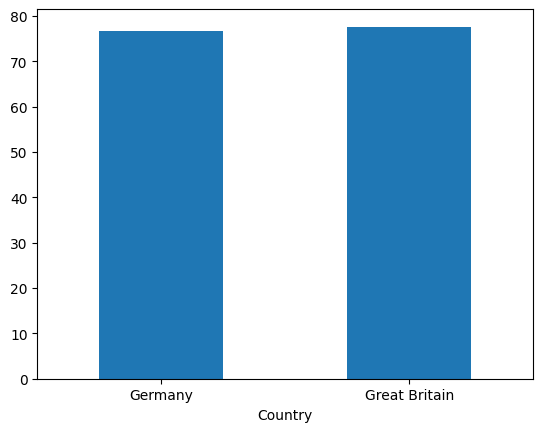

In [11]:
filtered_df1=df.query(" `Country`in ['Germany','Great Britain'] ")
filtered_df1.groupby("Country")["Life_Expectancy"].mean().plot(kind="bar",rot=0)


- Peut-on tester cela avec l'une des techniques vues dans les précédentes vidéos ?

In [12]:
filtered_df1.groupby("Country")["Life_Expectancy"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Germany,50.0,76.72600,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.62093,2.827548,71.9,75.350,77.5,80.400,81.4


verifion si l'on peut appliquer le test de student qui correspond ici:
- independant : yes
- repartition correct ou superieur a 30 : yes
- meme variance : pas vraiment (donc welsh test)

oui, on peut utiliser le test de welsh a 2 echabtillons ttest_ind

In [13]:
filtered_df1.groupby("Country")["Life_Expectancy"].apply(list)

Country
Germany          [70.6, 70.8, 71.0, 71.3, 71.5, 71.4, 71.8, 72....
Great Britain    [71.9, 71.9, 73.2, 73.8, 74.1, 74.3, 74.5, 74....
Name: Life_Expectancy, dtype: object

In [ ]:
result_test_welsh=ttest_ind(*filtered_df1.groupby("Country")["Life_Expectancy"].apply(list), equal_var=False)
# equal_var =False (il est True par defaut) permet d'avoir welsh au lieu de stutdent
result_test_welsh

TtestResult(statistic=np.float64(-1.3690726624972578), pvalue=np.float64(0.17435574230809686), df=np.float64(90.74548479669166))

## En Résumé after test de welsh 

In [17]:
print(f"H0: \"l'Allemagne et la Grande-Bretagne ont la même durée de vie moyenne de 1970 à 2020\"")

alpha = 0.02
p_value= result_test_welsh.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")   


H0: "l'Allemagne et la Grande-Bretagne ont la même durée de vie moyenne de 1970 à 2020"
nous n'avons pas suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.174355742308097


3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). (Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

In [ ]:

# Filtrer les données pour les États-Unis uniquement
df_usa = df.query("`Country` == 'USA'").sort_values("Year")

# Calculer la différence annuelle de l'espérance de vie et en faire une column
df_usa["life_diff"] = df_usa["Life_Expectancy"].diff()

# Retirer la première ligne (car diff() produit un NaN en première ligne)
df_usa = df_usa.dropna()
df_usa.head()




,Year,Country,Spending_USD,Life_Expectancy,life_diff
4,1970,USA,326.961,70.9,NaN
9,1971,USA,357.988,71.2,0.3
12,1972,USA,397.097,71.2,0.0
15,1973,USA,439.302,71.4,0.2
18,1974,USA,495.114,72.0,0.6


## En Résumé : 

In [ ]:
# Hypothèses :
print(f"H0: \" La moyenne des différences = 0.3\"")

# Test de Student (one-sample t-test)
result_test_1s = ttest_1samp(df_usa["life_diff"], 0.3)

# Niveau de confiance 98% (alpha = 0.02)
alpha = 0.02
alpha = 0.02
p_value= result_test_1s.pvalue 
if p_value< alpha :
    print("nous avons suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")
else:
    print("nous n'avons pas suffisament d'evidences pour rejeter H0","\n" f"NB: la p_value est {p_value.round(15)}")   


H0: " La moyenne des différences = 0.3"
nous avons suffisament d'evidences pour rejeter H0 
NB: la p_value est 0.000511201324919
